In [44]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

## Data Loading

In [2]:
# Read the data
df = pd.read_csv("C:\\Masters in Data Science\\184.702 VU 2021S Machine Learning\\Exercises\\Exercise - 2\\modeltree\\insurance.csv")

In [3]:
# See sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Number of rows and columns in dataset 
df.shape

(1338, 7)

In [5]:
# Getting some stats about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Check for the dtypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We see that the data is made up of both numerical and categorical columns

In [7]:
# Check for nulls
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We see that the dataset does not contain null values for any columns.

In [8]:
# Getting the numerical columns first
df.describe().columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

## Data Exploration

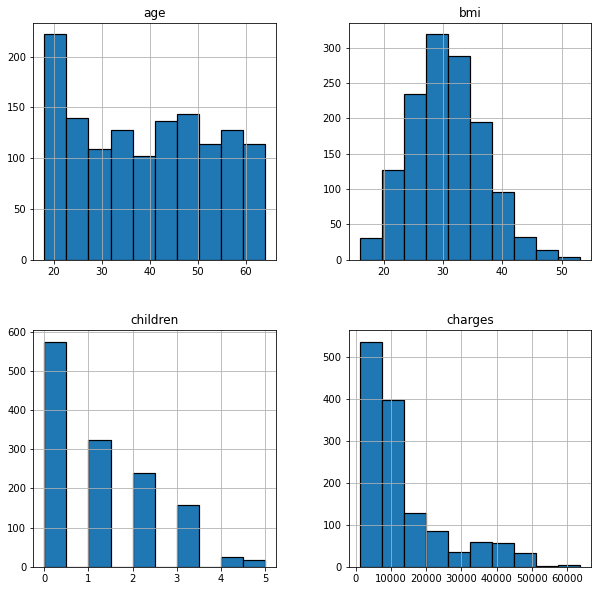

In [9]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(10, 10));

<AxesSubplot:>

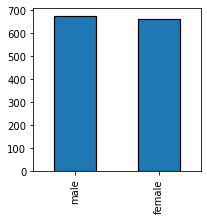

In [10]:
df['sex'].value_counts().plot(kind='bar',edgecolor='black', linewidth=1.2, figsize=(3, 3))

<AxesSubplot:>

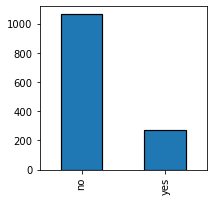

In [11]:
df['smoker'].value_counts().plot(kind='bar',edgecolor='black', linewidth=1.2, figsize=(3, 3))

<AxesSubplot:>

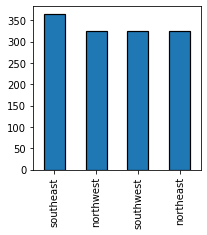

In [12]:
df['region'].value_counts().plot(kind='bar',edgecolor='black', linewidth=1.2, figsize=(3, 3))

In order to better understand the relationship between the dependent variable "charges" and the independent variables we draw scatter plots.<br>
We first plot the relationsship for the numerical features.

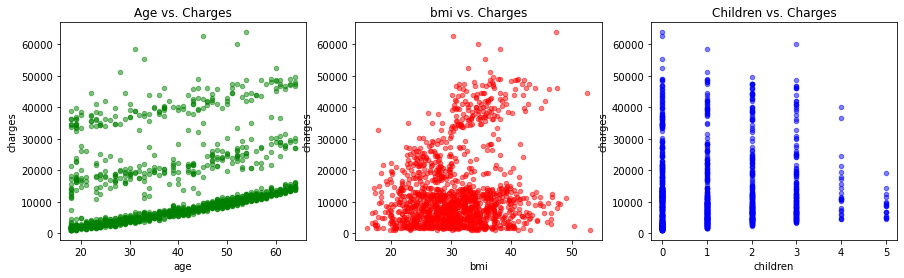

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
df.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="bmi vs. Charges")
df.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

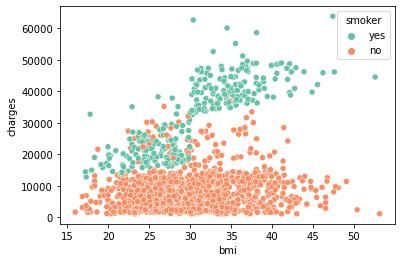

In [14]:
sns.scatterplot(x='bmi', y='charges', data=df, palette='Set2', hue='smoker')

The above plot shows the distribution of smokers and non-smokers in the BMI vs. Charges Scatter Plot

## Data Preprocessing

### Data Conversions and Encoding

We convert the features sex and smoker to numerical values

In [15]:
df.sex = [1 if each == "female" else 0 for each in df.sex]
df.smoker = [1 if each == "yes" else 0 for each in df.smoker]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


We need to pick the important ‘features’ that will have an impact on the target variable. For this we find the correlation(s) between the different features using data.corr()

In [16]:
# Finding out the correlation between the features
df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


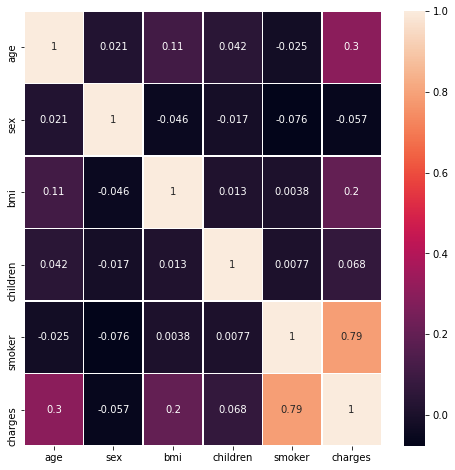

In [17]:
# Heatmap to show correlation
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, ax=axes)
plt.show()

Visualizing the correlation using a heat map to better explore the trends.

From this we can see the following observations:<br>
1) Strong correlation between charges and smoker.<br>
2) Weak correlation between charges and children.<br>
3) Weak correlation between charges and sex.<br>

In [18]:
# Correlation between charges and the other features.
df.corr()['charges'].sort_values()

sex        -0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

The above plots help us to visualize the data distribution for every feature

### Drop Irrelevant Columns

We drop the column region since it seems not to have much influence on the dependent variable

In [19]:
df.drop(["region"], axis=1, inplace=True)

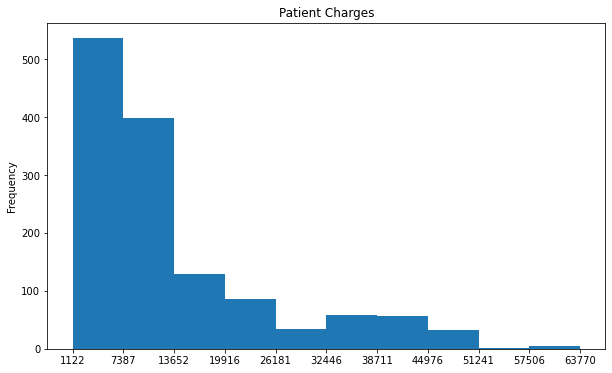

In [20]:
# Graph showing the min and maximum charges
count, bin_edges = np.histogram(df['charges'])
df['charges'].plot(kind='hist', xticks=bin_edges, figsize=(10,6))
plt.title("Patient Charges")
plt.show()

From the graph, the treatment charges of patients range from a minimum of 1122 for a significant number of patients and a maximum of 63770 for a few patients.

### Normalization of Data

In [21]:
df['bmi'] = (df - np.min(df))/(np.max(df) - np.min(df)).values
df.bmi

0       0.021739
1       0.000000
2       0.217391
3       0.326087
4       0.304348
          ...   
1333    0.695652
1334    0.000000
1335    0.000000
1336    0.065217
1337    0.934783
Name: bmi, Length: 1338, dtype: float64

The values were normalized between 0 and 1.

## Split into train and test set using HoldOut

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [23]:
#shuffle the data
df = shuffle(df)

df = df[:10]

In [24]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

Here we use the holdout method to create a 80/20 partition, with 80% of our data in a training set, and 20% of our data in a held out test set. The holdout method randomly samples according to our specification, and can be altered in the “test_size” feature in our notation. 

## Comparing with existing implementations of Regression Tree

###  Regression Tree 

In [25]:
from sklearn.tree import DecisionTreeRegressor 

# Fitting the model
rg = DecisionTreeRegressor(criterion='mse',max_depth=5,random_state = 13) 
rg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=13)

#### Visualizing the Regression Tree as text

In [26]:
from sklearn import tree

In [27]:
text_representation = tree.export_text(rg)
print(text_representation)

|--- feature_2 <= 0.35
|   |--- feature_2 <= 0.11
|   |   |--- feature_0 <= 20.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- value: [1253.94]
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- value: [2203.74]
|   |   |--- feature_0 >  20.50
|   |   |   |--- value: [2639.04]
|   |--- feature_2 >  0.11
|   |   |--- value: [4618.08]
|--- feature_2 >  0.35
|   |--- feature_2 <= 0.62
|   |   |--- feature_0 <= 44.50
|   |   |   |--- value: [7633.72]
|   |   |--- feature_0 >  44.50
|   |   |   |--- value: [7935.29]
|   |--- feature_2 >  0.62
|   |   |--- feature_2 <= 0.76
|   |   |   |--- value: [11015.17]
|   |   |--- feature_2 >  0.76
|   |   |   |--- value: [11944.59]



#### Visualizing the Regression Tree using plot_tree

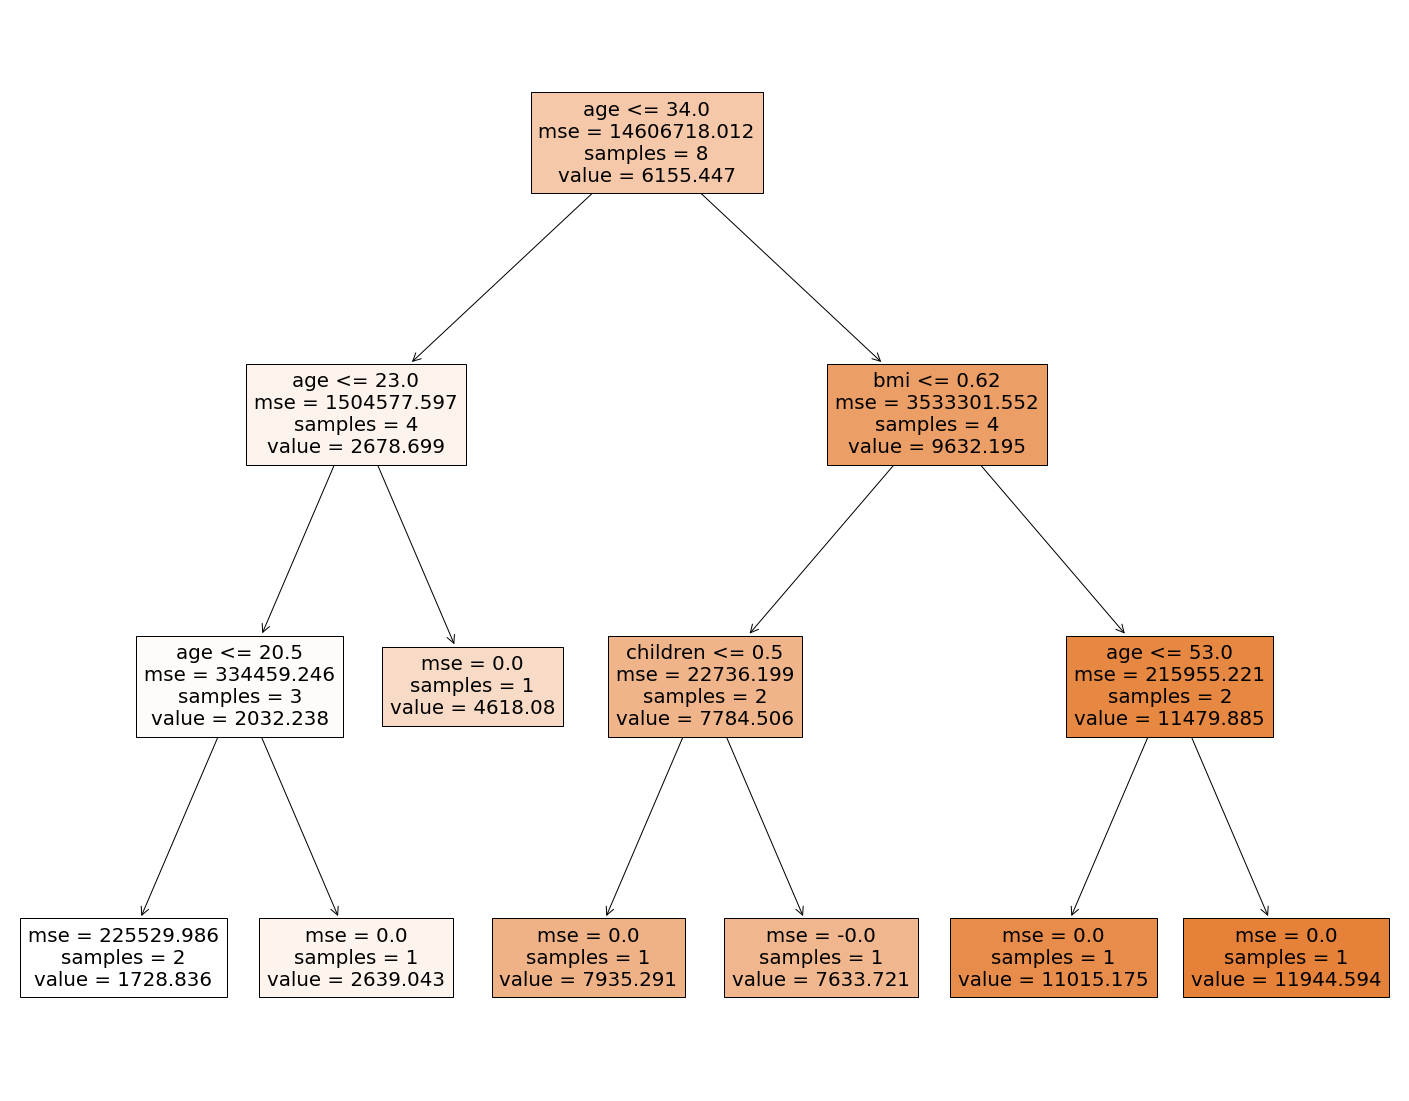

In [28]:
# Fitting the model
rg_3 = DecisionTreeRegressor(max_depth=3) 
rg_3.fit(x_train,y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rg_3, 
                   feature_names=x.describe().columns,  
                   filled=True)

## Comparing with other regression techniques

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

# Fitting the model
lr = LinearRegression(fit_intercept=False).fit(x_train,y_train)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the model
rf = RandomForestRegressor(n_estimators = 400, max_depth=5, random_state=13)
rf.fit(x_train, y_train);

## Model Predictions

In [31]:
# Predictions for sklearn Regression Tree
rg_y_train_pred = rg.predict(x_train)
rg_y_test_pred = rg.predict(x_test)

# Predictions for Linear Regression
lr_y_train_pred = lr.predict(x_train)
lr_y_test_pred = lr.predict(x_test)

# Predictions for Random Forest
rf_y_train_pred = rf.predict(x_train)
rf_y_test_pred = rf.predict(x_test)

## Model Evaluation

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import math

### R Square

R Square measures how much of variability in dependent variable can be explained by the model. It is square of Correlation Coefficient(R) and that is why it is called R Square.

In [33]:
# R2 for sklearn Regression Tree
rg_r2_train = r2_score(y_train,rg_y_train_pred)
rg_r2_test = r2_score(y_test,rg_y_test_pred)

# R2 for Linear Regression
lr_r2_train = r2_score(y_train,lr_y_train_pred)
lr_r2_test = r2_score(y_test,lr_y_test_pred)

# R2 for Random Forest
rf_r2_train = r2_score(y_train,rf_y_train_pred)
rf_r2_test = r2_score(y_test,rf_y_test_pred)

### Adjusted R Square

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalise additional independent variables added to the model and adjust the metric to prevent overfitting issue.

In [34]:
# AR2 for sklearn Regression Tree
rg_ar2_train = 1 - (1-rg.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
rg_ar2_test = 1 - (1-rg.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# AR2 for Linear Regression
lr_ar2_train = 1 - (1-lr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
lr_ar2_test = 1 - (1-lr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

# AR2 for Random Forest
rf_ar2_train = 1 - (1-rf.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
rf_ar2_test = 1 - (1-rf.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


### Mean Square Error(MSE)/Root Mean Square Error(RMSE)

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit. <br>
Root Mean Square Error(RMSE) is the square root of MSE

In [35]:
# MSE for sklearn Regression Tree
rg_mse_train = mean_squared_error(y_train,rg_y_train_pred)
rg_mse_test = mean_squared_error(y_test,rg_y_test_pred)

# RMSE for sklearn Regression Tree
rg_rmse_train = math.sqrt(mean_squared_error(y_train, rg_y_train_pred))
rg_rmse_test = math.sqrt(mean_squared_error(y_test, rg_y_test_pred))

# MSE for Linear Regression
lr_mse_train =  mean_squared_error(y_train,lr_y_train_pred)
lr_mse_test =  mean_squared_error(y_test,lr_y_test_pred)

# RMSE for Linear Regression
lr_rmse_train = math.sqrt(mean_squared_error(y_train, lr_y_train_pred))
lr_rmse_test = math.sqrt(mean_squared_error(y_test, lr_y_test_pred))

# MSE for Random Forest
rf_mse_train =  mean_squared_error(y_train,rf_y_train_pred)
rf_mse_test =  mean_squared_error(y_test,rf_y_test_pred)

# RMSE for Random Forest
rf_rmse_train = math.sqrt(mean_squared_error(y_train, rf_y_train_pred))
rf_rmse_test = math.sqrt(mean_squared_error(y_test, rf_y_test_pred))

### Mean Absolute Error(MAE)

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of absolute value of error.

In [36]:
# MAE for sklearn Regression Tree
rg_mae_train =  mean_absolute_error(y_train,rg_y_train_pred)
rg_mae_test =   mean_absolute_error(y_test,rg_y_test_pred)

# MAE for Linear Regression
lr_mae_train =  mean_absolute_error(y_train,lr_y_train_pred)
lr_mae_test =  mean_absolute_error(y_test,lr_y_test_pred)

# MAE for Random Forest
rf_mae_train =  mean_absolute_error(y_train,rf_y_train_pred)
rf_mae_test =  mean_absolute_error(y_test,rf_y_test_pred)

### K-Fold Cross Validation

In [37]:
cv =5

from sklearn.model_selection import cross_val_predict

# cross validation for sklearn Regression Tree
rg_cv_pred = cross_val_predict(rg, x, y, cv=cv)
rg_cv = r2_score(y, rg_cv_pred)

# cross validation for sklearn Linear Regression
lr_cv_pred = cross_val_predict(lr, x, y, cv=cv)
lr_cv = r2_score(y, lr_cv_pred)

# cross validation for sklearn Random Forest 
rf_cv_pred = cross_val_predict(rf, x, y, cv=cv)
rf_cv = r2_score(y, rf_cv_pred)

In [38]:
def format_float(value):
    return f'{value:.2f}'

pd.options.display.float_format = format_float

training_R2 = [rg_r2_train, lr_r2_train, rf_r2_train]
testing_R2  = [rg_r2_test, lr_r2_test, rf_r2_test]

training_AR2 = [rg_ar2_train, lr_ar2_train, rf_ar2_train]
testing_AR2  = [rg_ar2_test, lr_ar2_test, rf_ar2_test]

training_MSE = [rg_mse_train, lr_mse_train, rf_mse_train]
testing_MSE = [rg_mse_test, lr_mse_test, rf_mse_test]

training_RMSE = [rg_rmse_train, lr_rmse_train, rf_rmse_train]
testing_RMSE = [rg_rmse_test, lr_rmse_test, rf_rmse_test]

training_MAE = [rg_mae_train, lr_mae_train, rf_mae_train]
testing_MAE = [rg_mae_test, lr_mae_test, rf_mae_test]

cv_accuracies = [rg_cv, lr_cv, rf_cv]

parameters = ["max_depth=5", "fit_intercept=False", "n_estimators=400, max_depth=5"]
              
table_data = { "Parameters": parameters,
                  "Training R2": training_R2, 
                  "Testing R2": testing_R2,
                  "Training AR2": training_AR2, 
                  "Testing AR2": testing_AR2, 
                  "Training MSE": training_MSE, 
                  "Testing MSE": testing_MSE,
                  "Training RMSE": training_RMSE, 
                  "Testing RMSE": testing_RMSE,
                  "K-Fold Score": cv_accuracies}
model_names = ["Decision Tree Regression - sklearn", "Linear Regression", "Random Forest"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training R2,Testing R2,Training AR2,Testing AR2,Training MSE,Testing MSE,Training RMSE,Testing RMSE,K-Fold Score
Decision Tree Regression - sklearn,max_depth=5,1.00,-2.77,1.00,1.94,0.00,1084841.46,0.00,1041.56,0.74
Linear Regression,fit_intercept=False,0.98,0.46,0.94,1.14,231240.15,156073.69,480.87,395.06,0.92
Random Forest,"n_estimators=400, max_depth=5",0.97,-0.41,0.90,1.35,415059.71,406449.92,644.25,637.53,0.81


 ### Compare the training and testing R2 for each model

<AxesSubplot:>

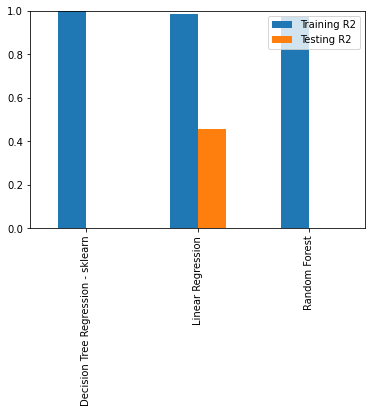

In [39]:
table_dataframe.iloc[:, 1:3].plot(kind="bar", ylim=[0.0, 1.0])

 ### Compare the training and testing AR2 for each model

<AxesSubplot:>

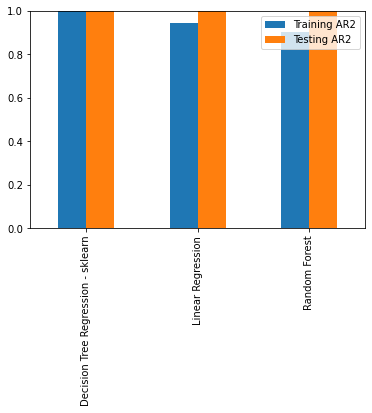

In [40]:
table_dataframe.iloc[:, 3:5].plot(kind="bar", ylim=[0.0, 1.0])

 ### Compare the training and testing MSE for each model

<AxesSubplot:>

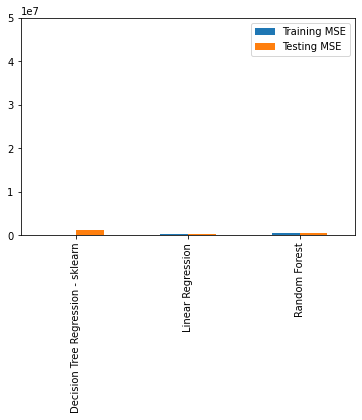

In [41]:
table_dataframe.iloc[:, 5:7].plot(kind="bar", ylim=[0, 50000000])

 ### Compare the training and testing RMSE for each model

<AxesSubplot:>

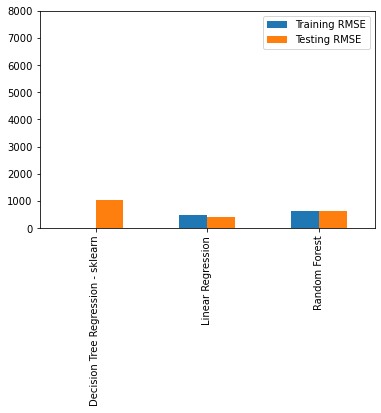

In [42]:
table_dataframe.iloc[:, 7:9].plot(kind="bar", ylim=[0, 8000])

### Compare the score values for K-Fold Cross Validation

<AxesSubplot:>

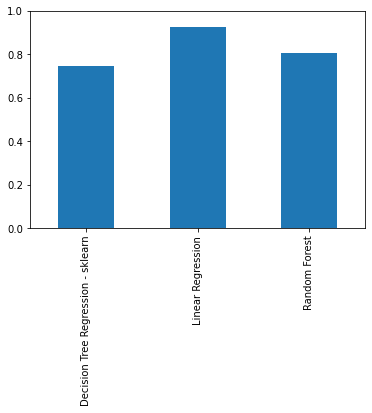

In [43]:
table_dataframe.iloc[:, 9].plot(kind="bar", ylim=[0.0, 1.0])